In [1]:
import sqlite3, matplotlib.pyplot as plt, pandas as pd, numpy as np
%matplotlib inline
connection = sqlite3.connect('../database.db')
pd.set_option('display.max_rows', 500)

notebookMetrics = ["accuracy", "auc", "recall", "precision"]

## List each notebook metric

In [2]:
df = pd.read_sql_query("""
    SELECT nb.configuration_id, nb.architecture, nb.loss, nb.accuracy, nb.auc, nb.recall, nb."precision"
    FROM notebook AS nb
    ORDER BY nb.id
""", connection)
df

,configuration_id,architecture,loss,accuracy,auc,recall,precision
0,1,ConvNeXt,0.473472,0.000000,0.981422,0.818608,0.851671
1,1,ResNetV2,5.866637,0.281985,0.865510,0.735609,0.736102
2,1,Xception,6.964890,0.088449,0.779053,0.568273,0.571332
3,2,ConvNeXt,7.745555,0.570568,0.878876,0.771084,0.771084
4,2,ResNetV2,53.565731,0.858386,0.820786,0.685408,0.685408
5,2,Xception,24.090885,0.804552,0.841543,0.713521,0.713521
6,3,ConvNeXt,0.991117,0.000765,0.944856,0.715529,0.747552
7,3,ResNetV2,0.898044,0.000765,0.946148,0.699464,0.765007
8,3,Xception,1.188051,0.009466,0.949269,0.694110,0.753086
9,4,ConvNeXt,0.801396,0.000000,0.950548,0.715529,0.788348


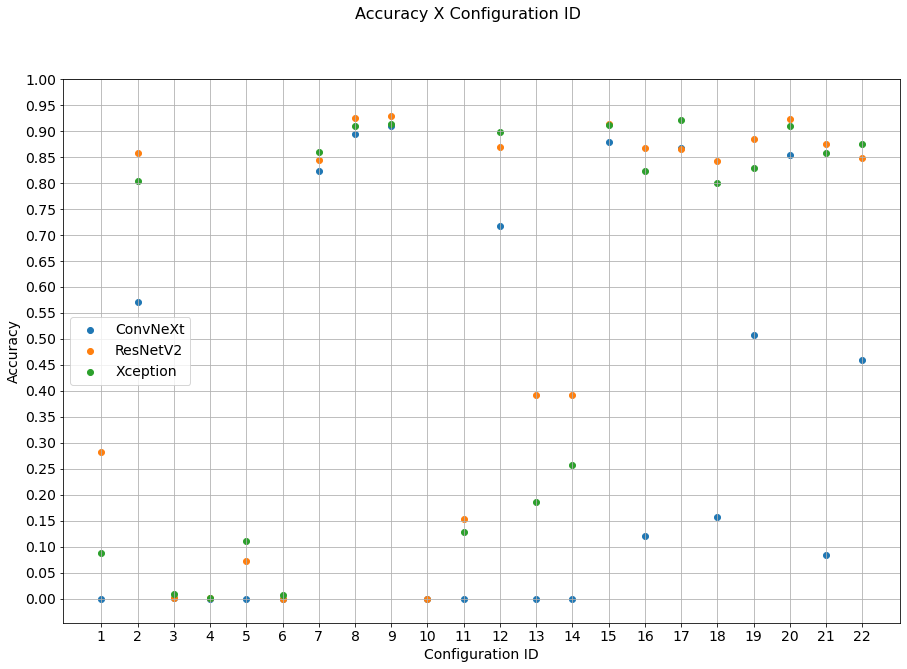

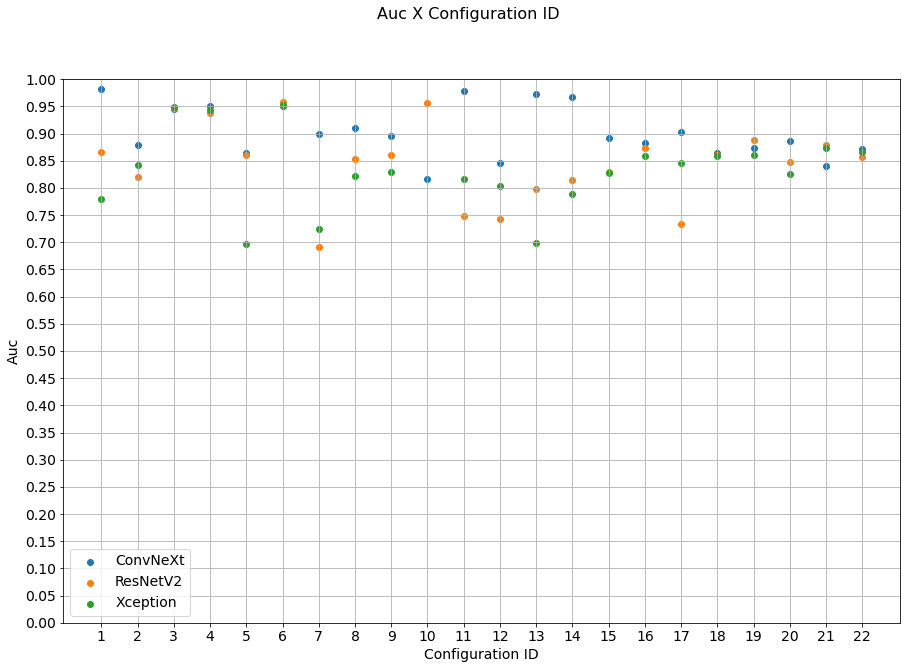

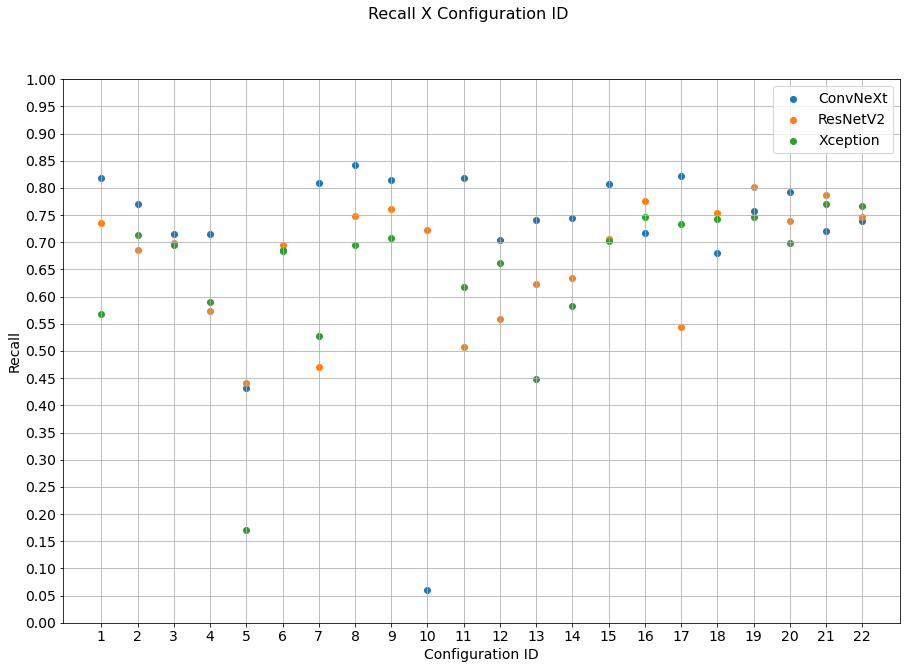

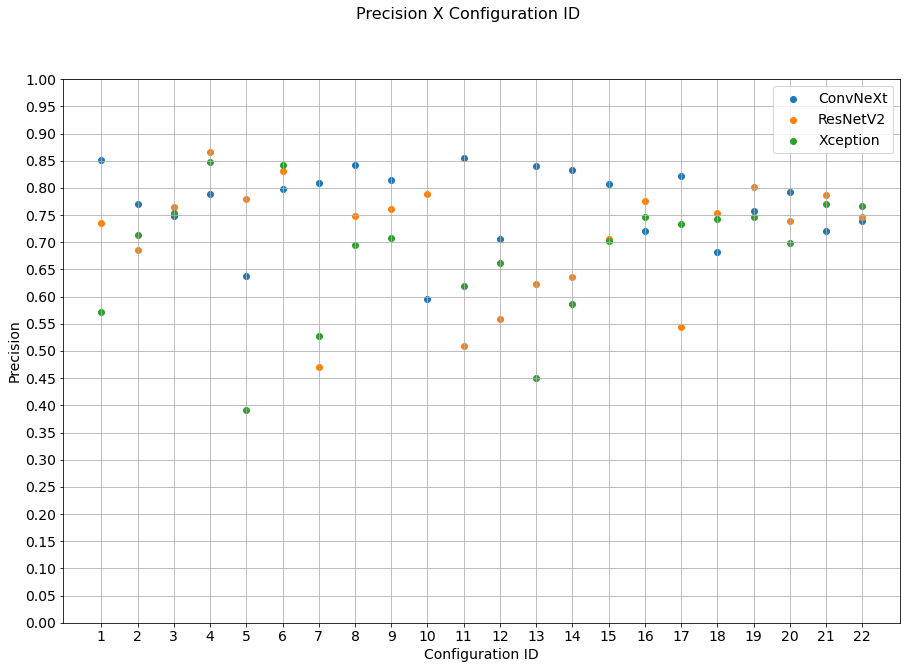

In [3]:
for i, metric in enumerate(notebookMetrics):
    plt.figure(figsize=(15,10))
    plt.rc('font', size=14)
    for arch, group in df.groupby('architecture'):
        plt.scatter(group['configuration_id'], group[metric], label=arch, marker='o')
    plt.xticks(range(df['configuration_id'].min(), df['configuration_id'].max() + 1))
    plt.ylabel(metric.capitalize())
    plt.yticks(np.arange(0, 1.05, 0.05))
    plt.xlabel('Configuration ID')
    plt.legend()
    plt.grid()
    plt.suptitle(''.join([metric.capitalize(),' X Configuration ID']), fontsize=16)
    plt.show()

### Loss metric

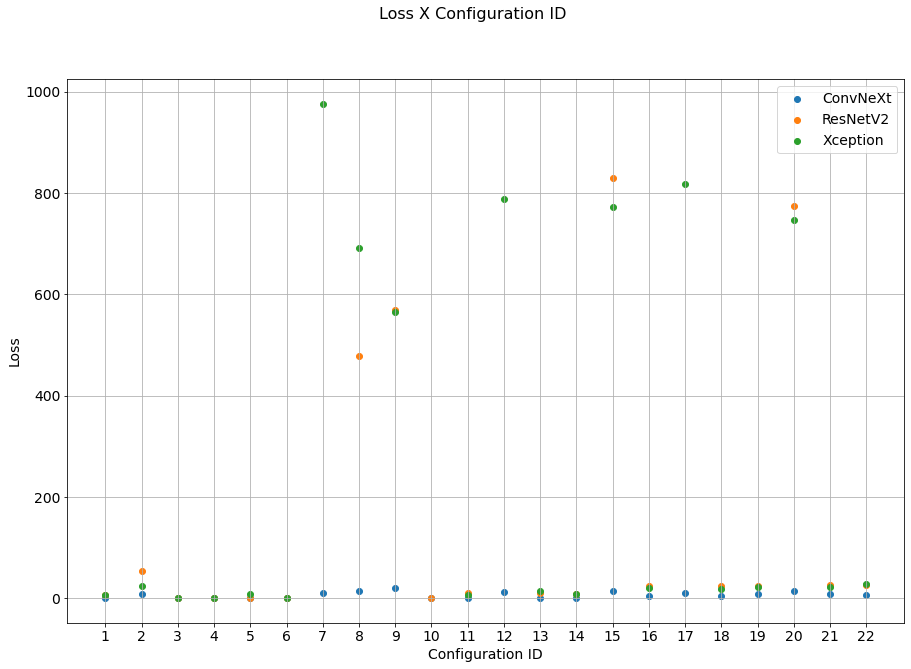

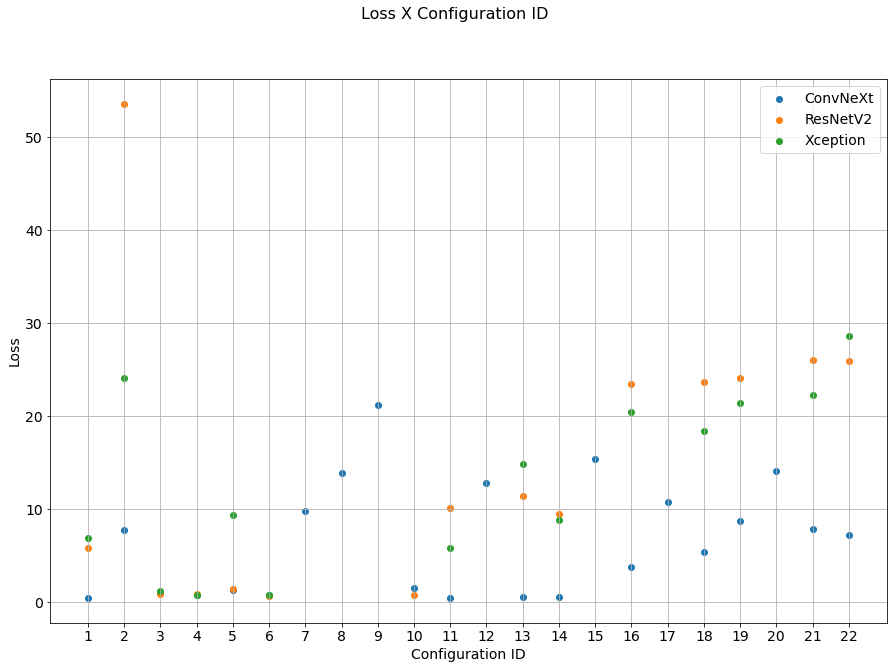

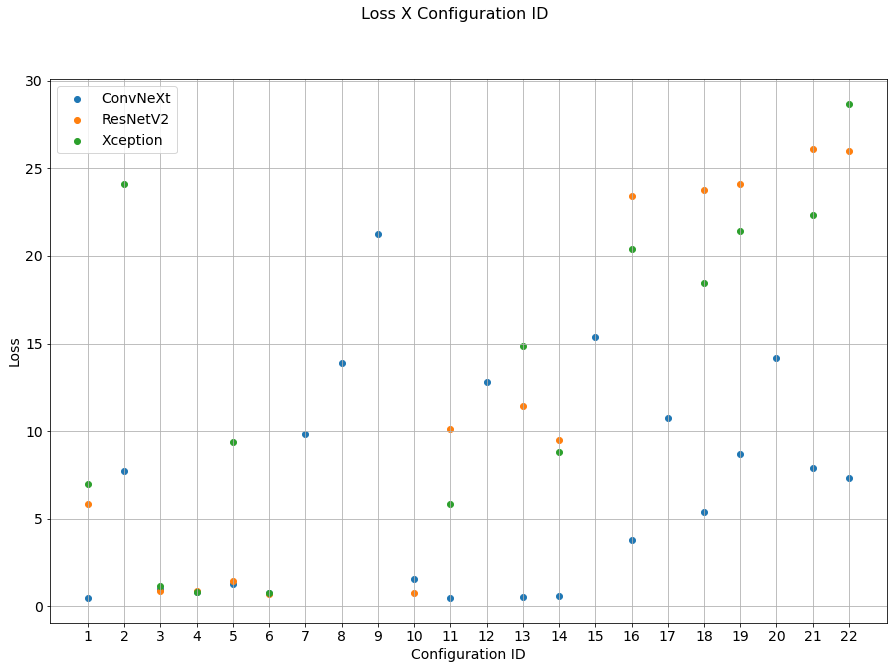

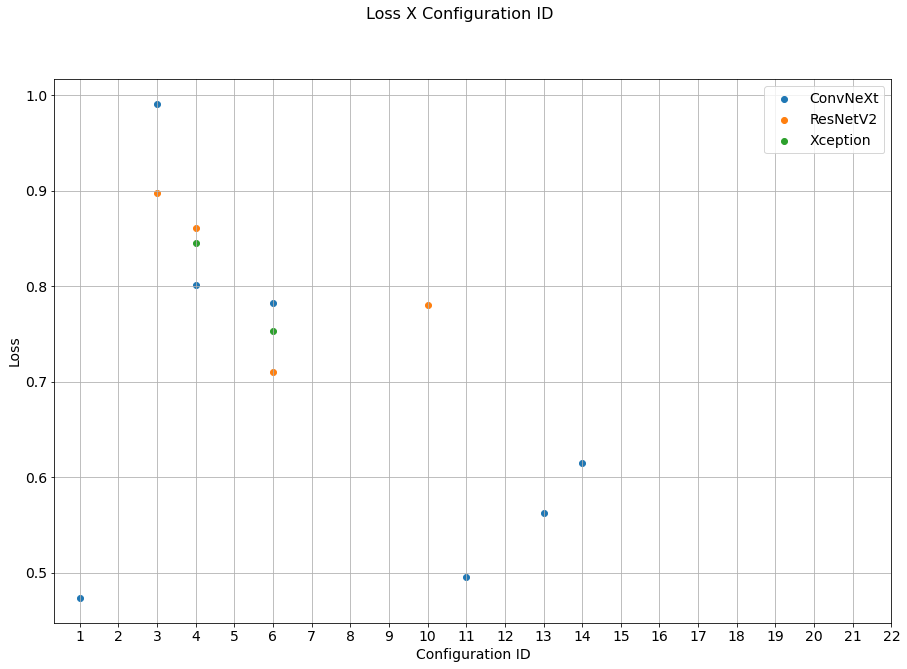

In [4]:
def showGraph(df,limit=1000):
    plt.figure(figsize=(15,10))
    plt.rc('font', size=14)
    for arch, group in df.groupby('architecture'):
        limitedGroup = group[group['loss'] <= limit]
        plt.scatter(limitedGroup['configuration_id'], limitedGroup['loss'], label=arch, marker='o')
    plt.xticks(range(df['configuration_id'].min(), df['configuration_id'].max() + 1))
    plt.ylabel('Loss')
    plt.xlabel('Configuration ID')
    plt.legend()
    plt.grid()
    plt.suptitle('Loss X Configuration ID', fontsize=16)
    plt.show()

showGraph(df)
showGraph(df,400)
showGraph(df,30)
showGraph(df,1)

In [5]:
connection.close()